In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pickle

#graph hangul fonts
from matplotlib import font_manager, rc

from scipy.stats import spearmanr
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogLocator, LogFormatterSciNotation, LogFormatterMathtext, LogFormatterExponent
import types

In [2]:
with open("heatmap_matrix.pkl", "rb") as f:
    mat = pickle.load(f)
data = pd.read_csv("sci_lex.csv")

In [3]:
platform = ['YouTube', 'Spotify', 'Netflix Film', 'Netflix TV'] # 'YouTube Music', 'Spotify Weekly'
country_code = ["US", "CA", "GB", "DE", "FR", "BR", "MX", "IN", "JP", "KR"]

In [4]:
from sklearn.linear_model import LinearRegression
from scipy import stats

def regression(x, y):
    x=np.array(x)
    y=np.array(y)

    result = stats.linregress(np.log10(x), np.log10(y))
    
    r_value = result.rvalue
    p_value = result.pvalue

    # Predicting y for the minimum and maximum x values
    x_minmax = np.array([min(x), max(x)])
    y_pred = result.slope * np.log10(x_minmax) + result.intercept


    return x_minmax, y_pred, r_value**2, p_value

In [5]:
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left") 
    oy = bottom - pad * self.figure.dpi / 72.0
    self.offsetText.set_position((1, oy))

In [6]:
y_ticks1 = [[200, 1000, 10000, 30000],
         [500, 1000, 5000],
         [100, 200, 300, 400],
         [50, 100, 200]]
xticks_sci = [100, 1000, 10000]
xticks_lan = [1, 10, 100]

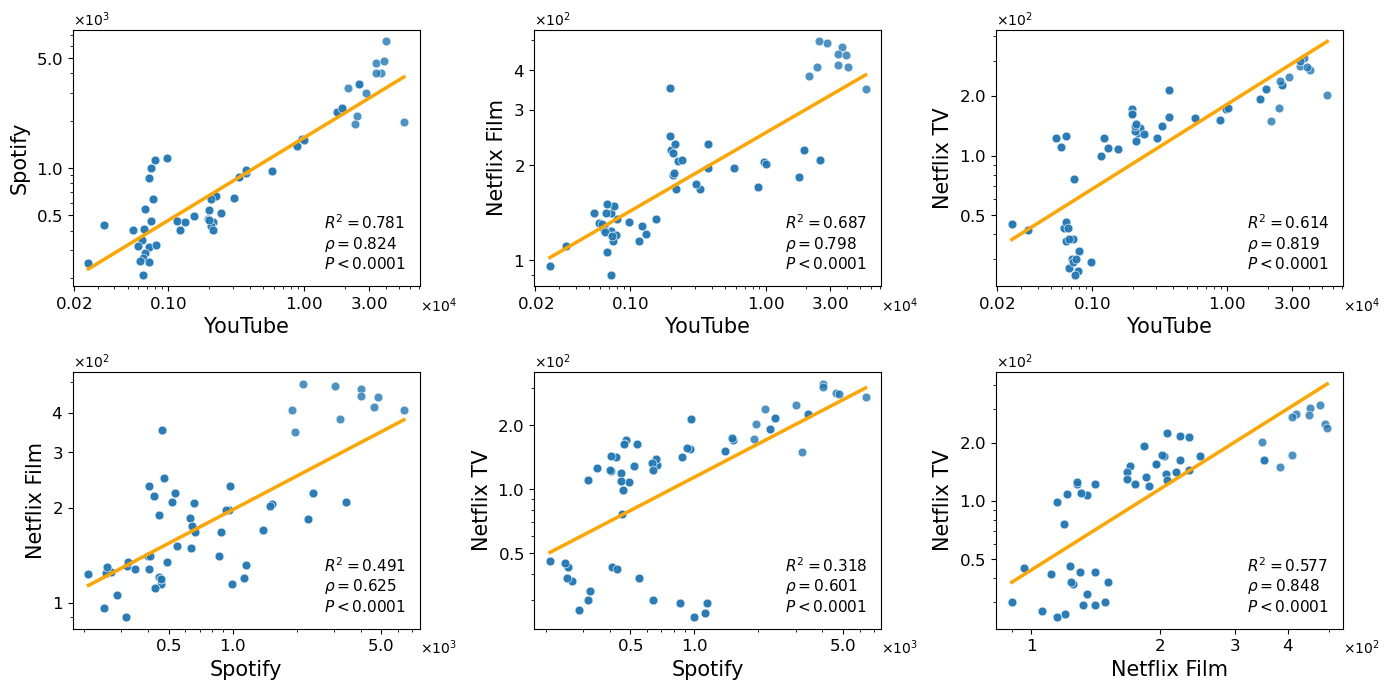

In [7]:
significance_levels = [0.10, 0.05, 0.01, 0.001, 0.0001]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))

platform = ['YouTube', 'Spotify', 'Netflix Film', 'Netflix TV'] # 'YouTube Music', 'Spotify Weekly'

cnt = 0
for idx in range(len(platform)):
    base_platform = platform[idx]
    
    for idy in range(idx+1, len(platform)):
        p = platform[idy]
        
        i = int(cnt/3)
        j = int(cnt%3)
        
        x_minmax, y_pred, r2, _r = regression(data[base_platform], data[p])
        rho, _ = spearmanr(np.log10(data[base_platform]), np.log10(data[p]))
    
        for level in significance_levels:
            if _ < level:
                p_val = level

        for level in significance_levels:
            if _ < level:
                p_val = level
        for level in significance_levels:
            if _r < level:
                p_val_r = level
            
        sns.scatterplot(data, x=base_platform, y=p, s=40, alpha=0.8, ax=axes[i, j])
        axes[i, j].plot(x_minmax, 10**y_pred, color = 'orange', linewidth=2.5)

        legend = axes[i, j].legend([rf'$R^2={r2:.3f}$'+'\n'+rf'$\rho={rho:.3f}$'+'\n'+rf'$P < {p_val}$'], handlelength = 0, handletextpad = 0, loc='lower right', fontsize=11, frameon=False)
        legend.legend_handles[0].set_visible(False)
        
        axes[i, j].set_xscale("log")
        axes[i, j].set_yscale("log")
        
        axes[i, j].set_xticks(y_ticks1[idx])
        axes[i, j].set_yticks(y_ticks1[idy])
        
        axes[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axes[i, j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
        axes[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axes[i, j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        
        pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]
        axes[i, j].xaxis._update_offset_text_position = types.MethodType(bottom_offset, axes[i, j].xaxis)

        axes[i, j].set_xlabel(base_platform, fontsize=15)
        axes[i, j].set_ylabel(p, fontsize=15)
        axes[i, j].tick_params(axis='x', labelsize=12)
        axes[i, j].tick_params(axis='y', labelsize=12)
        
        cnt += 1

plt.tight_layout()
plt.savefig('./results/figure2_platform_platform.pdf')
plt.show()